In [1]:
from aqua.util import load_yaml, get_arg, create_folder, dump_yaml

In [3]:
import pandas as pd
from pandas import json_normalize
import glob

In [4]:
machines = ["LUMI-C", "LUMI-G"]
# machines = ["lumi", "mn4"]
# ensembles = ["p000", "p001", "p002", "p003"]
ensembles = ["fc0", "fc1", "fc2", "fc3","fc4", "fc5", "fc6", "fc7", "fc8", "fc9"]

consolidated_df = pd.DataFrame()
data= {}
for machine in machines:
    data_ensembles= {}
    for ensemble in ensembles:
        # pattern = f"/scratch/project_465000454/sughosh/ecmean_files/YAML/*{machine}*/*{ensemble}*yml"
        pattern = f"/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*{machine}*/*/*{ensemble}*yml"
        print(pattern)
        print(machine, ensemble)
        yaml_files = glob.glob(pattern)
        loaded_yaml= load_yaml(yaml_files[0])
        data_ensembles[ensemble] = loaded_yaml
        # print(pattern)
    data[machine] = data_ensembles
    

/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc0*yml
LUMI-C fc0
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc1*yml
LUMI-C fc1
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc2*yml
LUMI-C fc2
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc3*yml
LUMI-C fc3
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc4*yml
LUMI-C fc4
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc5*yml
LUMI-C fc5
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc6*yml
LUMI-C fc6
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc7*yml
LUMI-C fc7
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/repli

In [5]:
data

{'LUMI-C': {'fc0': {'tas': {'ALL': {'Global': 25.088, 'North Midlat': 12.21, 'Tropical': 37.198, 'South Midlat': 29.145}, 'DJF': {'Global': 13.92, 'North Midlat': 9.96, 'Tropical': 17.706, 'South Midlat': 14.403}, 'JJA': {'Global': 28.742, 'North Midlat': 17.176, 'Tropical': 40.567, 'South Midlat': 20.87}}, 'pr': {'ALL': {'Global': 4.863, 'North Midlat': 4.608, 'Tropical': 6.207, 'South Midlat': 2.431}, 'DJF': {'Global': 2.498, 'North Midlat': 3.267, 'Tropical': 2.905, 'South Midlat': 0.916}, 'JJA': {'Global': 29.193, 'North Midlat': 1.47, 'Tropical': 57.158, 'South Midlat': 1.008}}, 'psl': {'ALL': {'Global': 4.244, 'North Midlat': 3.011, 'Tropical': 5.297, 'South Midlat': 3.371}, 'DJF': {'Global': 2.031, 'North Midlat': 1.453, 'Tropical': 2.233, 'South Midlat': 2.207}, 'JJA': {'Global': 3.733, 'North Midlat': 2.989, 'Tropical': 5.098, 'South Midlat': 1.746}}, 'ta': {'ALL': {'Global': 96.382, 'North Midlat': 139.167, 'Tropical': 83.008, 'South Midlat': 80.344}, 'DJF': {'Global': 63.626

In [6]:
data["lumi"]["p000"]["ua"]

KeyError: 'lumi'

In [7]:
machines = []
ensembles = []
variables = []
seasons = []
regions = []
values = []

for machine in data:
    for ensemble in data[machine]:
        for variable in data[machine][ensemble]:
            for season in data[machine][ensemble][variable]:
                for region in data[machine][ensemble][variable][season]:
                    # for va in data[machine][ensemble][variable][season]:
                    # if variable == "ua":
                        machines.append(machine)
                        ensembles.append(ensemble)
                        variables.append(variable)
                        seasons.append(season)
                        regions.append(region)
                        value = data[machine][ensemble][variable][season][region]
                        values.append( value )
                    # print(machine, ensemble, variable, season, region)
                    # if variable == "tas":
                    #     print(machine, variable, value)
                    

# Create a DataFrame
df = pd.DataFrame({'machines': machines, 'ensembles': ensembles, 'variables': variables, 'seasons': seasons, 'locations': regions, 'pi_score': values})
# df

In [8]:
df.variables.unique()

array(['tas', 'pr', 'psl', 'ta', 'ua', 'va', 'hus', 'tos', 'sos',
       'siconc'], dtype=object)

In [9]:
# df[df['ensembles']=="fc5"]
df[df['variables']=="sos"][df['ensembles']=="fc1"]


/tmp/ipykernel_172445/909169113.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['variables']=="sos"][df['ensembles']=="fc1"]


,machines,ensembles,variables,seasons,locations,pi_score
216,LUMI-C,fc1,sos,ALL,Global,8.256
217,LUMI-C,fc1,sos,ALL,North Midlat,24.128
218,LUMI-C,fc1,sos,ALL,Tropical,4.807
219,LUMI-C,fc1,sos,ALL,South Midlat,5.917
220,LUMI-C,fc1,sos,DJF,Global,6.688
221,LUMI-C,fc1,sos,DJF,North Midlat,23.199
222,LUMI-C,fc1,sos,DJF,Tropical,3.459
223,LUMI-C,fc1,sos,DJF,South Midlat,3.654
224,LUMI-C,fc1,sos,JJA,Global,7.385
225,LUMI-C,fc1,sos,JJA,North Midlat,16.140


In [10]:
df[df["variables"]=="ua"].head(20)

,machines,ensembles,variables,seasons,locations,pi_score
48,LUMI-C,fc0,ua,ALL,Global,15.032
49,LUMI-C,fc0,ua,ALL,North Midlat,21.778
50,LUMI-C,fc0,ua,ALL,Tropical,8.331
51,LUMI-C,fc0,ua,ALL,South Midlat,21.687
52,LUMI-C,fc0,ua,DJF,Global,5.468
53,LUMI-C,fc0,ua,DJF,North Midlat,4.766
54,LUMI-C,fc0,ua,DJF,Tropical,3.996
55,LUMI-C,fc0,ua,DJF,South Midlat,9.114
56,LUMI-C,fc0,ua,JJA,Global,14.008
57,LUMI-C,fc0,ua,JJA,North Midlat,12.291


In [12]:
consolidated_df.to_csv("pi_scores.csv", index=False)

In [11]:
df.variables.unique()

array(['tas', 'pr', 'psl', 'ta', 'ua', 'va', 'hus', 'tos', 'sos',
       'siconc'], dtype=object)

In [14]:
# df[df["variables"]== "ta"].value.isna().any().any()
# df[df["variables"]== "tos"]
df = df[df['variables'] != "sos"]
df = df[df['variables'] != "pr"]

df = df[df['variables'] != "siconc"]

In [12]:
from scipy.stats import kstest
from scipy.stats import ks_2samp


In [13]:
vars = []
seasons = []
regions = []
p_values = []
KS_score = {}

for variable in df.variables.unique():
    # if variable == "pr":
        for season in df.seasons.unique():
            # if season == "ALL":
                for location in df.locations.unique():
                    # if location == "Tropical" :
                        filtered_df= df[(df["variables"] == variable) & (df["seasons"] == season) & (df["locations"]== location)]
                        machine1= filtered_df[(filtered_df["machines"]==df.machines.unique()[0])]
                        machine2= filtered_df[(filtered_df["machines"]==df.machines.unique()[1])]
                        vars.append(variable)
                        seasons.append(season+"_"+location)
                        regions.append(location)
                        
                        ks_score, pvalue = ks_2samp(machine1.pi_score.values, machine2.pi_score.values) 
                        p_values.append(pvalue)
                    # KS_score = 
                # print(ks_2samp)
            

# filter= df[(df["variable"] == "psl") & (df["season"] == "ALL") & (df["location"]== "Global")]
# mn4= df[df["variables"]== "mn4"]
# lumi= filter[filter["machine"]== "lumi"]
# ks_2samp(lumi.Value.values, mn4.Value.values)

In [14]:
import numpy as np
msl_mn4 = np.array([0.26,0.25,0.27,0.28])
msl_lumi = np.array([0.25,0.24,0.24,0.24])
ks_2samp(msl_mn4, msl_lumi)


KstestResult(statistic=0.75, pvalue=0.22857142857142862, statistic_location=0.25, statistic_sign=-1)

In [15]:
print(machine1)
print(machine2)

     machines ensembles variables seasons     locations  pi_score
119    LUMI-C       fc0    siconc     JJA  South Midlat     6.712
239    LUMI-C       fc1    siconc     JJA  South Midlat     6.321
359    LUMI-C       fc2    siconc     JJA  South Midlat     6.989
479    LUMI-C       fc3    siconc     JJA  South Midlat     6.603
599    LUMI-C       fc4    siconc     JJA  South Midlat     6.450
719    LUMI-C       fc5    siconc     JJA  South Midlat     6.920
839    LUMI-C       fc6    siconc     JJA  South Midlat     6.556
959    LUMI-C       fc7    siconc     JJA  South Midlat     6.765
1079   LUMI-C       fc8    siconc     JJA  South Midlat     6.319
1199   LUMI-C       fc9    siconc     JJA  South Midlat     7.054
     machines ensembles variables seasons     locations  pi_score
1319   LUMI-G       fc0    siconc     JJA  South Midlat     6.530
1439   LUMI-G       fc1    siconc     JJA  South Midlat     6.568
1559   LUMI-G       fc2    siconc     JJA  South Midlat     6.821
1679   LUM

In [16]:
ks_2samp(machine1.pi_score.values, machine2.pi_score.values)

KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=6.765, statistic_sign=1)

In [17]:
df_new.variable.unique()

NameError: name 'df_new' is not defined

In [18]:
data = {'variable': vars, "season": seasons,  'p_value': p_values}
df_new = pd.DataFrame(data)
df_new

,variable,season,p_value
0,tas,ALL_Global,0.417524
1,tas,ALL_North Midlat,0.786930
2,tas,ALL_Tropical,0.052448
3,tas,ALL_South Midlat,0.786930
4,tas,DJF_Global,0.994458
...,...,...,...
115,siconc,DJF_South Midlat,0.786930
116,siconc,JJA_Global,0.417524
117,siconc,JJA_North Midlat,0.417524
118,siconc,JJA_Tropical,1.000000


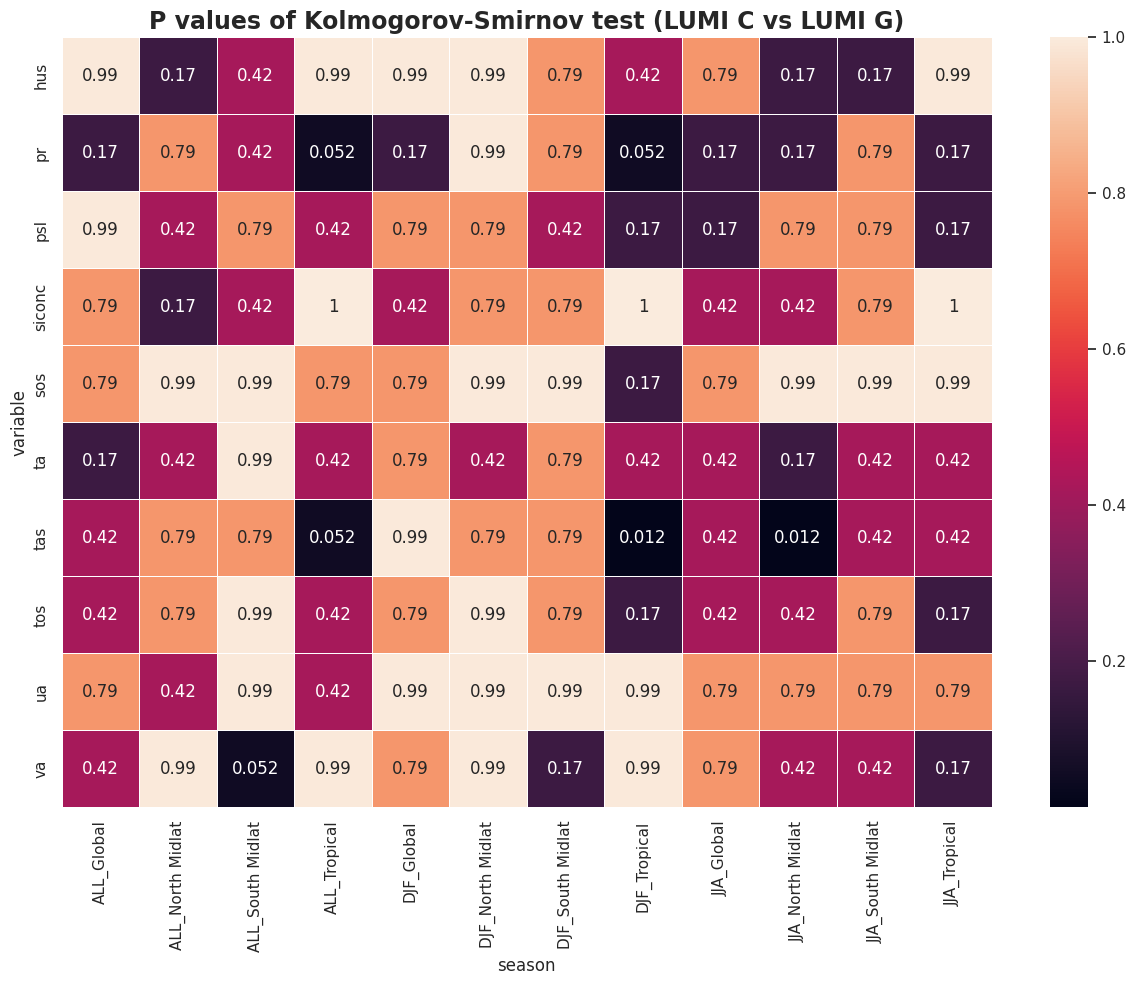

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
# df_new = df_new.drop_duplicates(subset=['variable', 'season'])
flights = df_new.pivot_table(index="variable", columns="season", values="p_value", aggfunc='mean')

# flights = df_new.pivot(index= "variable", columns= "season",values= "p_value")
fig, ax = plt.subplots(figsize=(15,10)) 
# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, linewidths=.5)
plt.title("P values of Kolmogorov-Smirnov test (LUMI C vs LUMI G)",fontsize=17, fontweight='bold')
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)
# plt.savefig("/gpfs/scratch/dese28/dese28422/ecmean_files/figs/mn4_lumi_KS_test_p_value.png", bbox_inches='tight')
plt.savefig("/scratch/project_465000454/sughosh/AQUA/diagnostics/ecmean/notebook/lumi_C_G_KS_test_p_value.png", bbox_inches='tight')

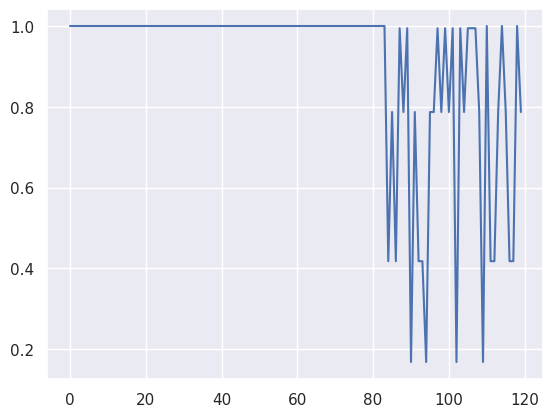

In [87]:
plt.plot(p_values)
# p_values

In [22]:
nested_dict = {}

for _, row in df_new.iterrows():
    variable = row['variable']
    season = row['season']
    region = row['region']
    p_value = row['p_value']

    if variable not in nested_dict:
        nested_dict[variable] = {}

    if season not in nested_dict[variable]:
        nested_dict[variable][season] = {}

    nested_dict[variable][season][region] = p_value

nested_dict

KeyError: 'region'

In [30]:
dump_yaml("/gpfs/scratch/dese28/dese28422/ecmean_files/YAML/mn4_lumi_KS_test_p_value.yml", nested_dict)

In [2]:
from aqua.util import load_yaml, get_arg, create_folder, dump_yaml
import pandas as pd
from scipy.stats import ks_2samp
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc0*yml
LUMI-C fc0
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc1*yml
LUMI-C fc1
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc2*yml
LUMI-C fc2
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc3*yml
LUMI-C fc3
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc4*yml
LUMI-C fc4
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc5*yml
LUMI-C fc5
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc6*yml
LUMI-C fc6
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc7*yml
LUMI-C fc7
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/repli

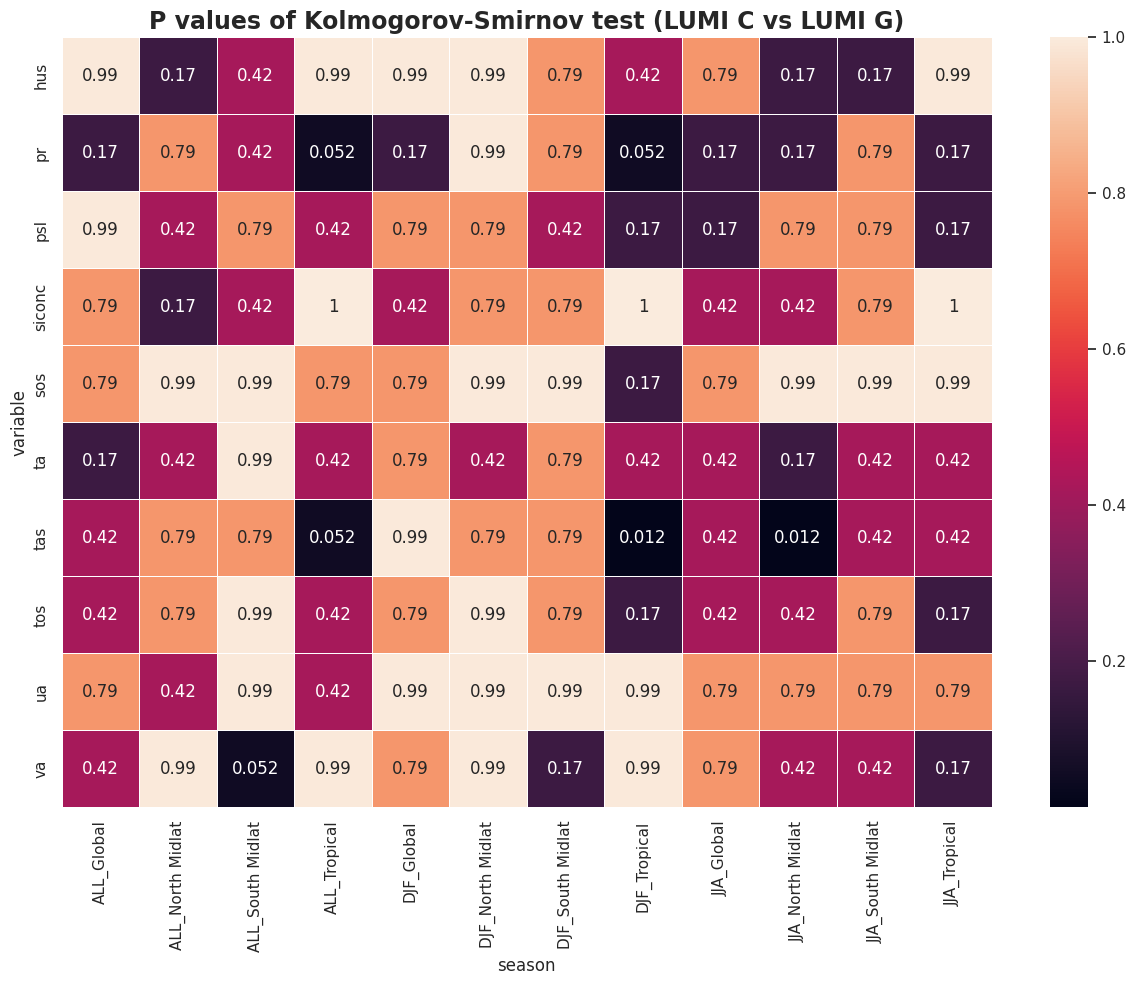

In [4]:
from aqua.util import load_yaml, get_arg, create_folder, dump_yaml
import pandas as pd
from scipy.stats import ks_2samp
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


machines = ["LUMI-C", "LUMI-G"]
# machines = ["lumi", "mn4"]
# members = ["p000", "p001", "p002", "p003"]
members = ["fc0", "fc1", "fc2", "fc3","fc4", "fc5", "fc6", "fc7", "fc8", "fc9"]

consolidated_df = pd.DataFrame()
data= {}
for machine in machines:
    data_members= {}
    for member in members:
        # pattern = f"/scratch/project_465000454/sughosh/ecmean_files/YAML/*{machine}*/*{member}*yml"
        pattern = f"/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*{machine}*/*/*{member}*yml"
        print(pattern)
        print(machine, member)
        yaml_files = glob.glob(pattern)
        loaded_yaml= load_yaml(yaml_files[0])
        data_members[member] = loaded_yaml
        # print(pattern)
    data[machine] = data_members
    
    
machines = []
members = []
variables = []
seasons = []
regions = []
values = []

for machine in data:
    for member in data[machine]:
        for variable in data[machine][member]:
            for season in data[machine][member][variable]:
                for region in data[machine][member][variable][season]:
                    # for va in data[machine][member][variable][season]:
                    # if variable == "ua":
                        machines.append(machine)
                        members.append(member)
                        variables.append(variable)
                        seasons.append(season)
                        regions.append(region)
                        value = data[machine][member][variable][season][region]
                        values.append( value )
                    # print(machine, member, variable, season, region)
                    # if variable == "tas":
                    #     print(machine, variable, value)
                    

# Create a DataFrame
df = pd.DataFrame({'machines': machines, 'members': members, 'variables': variables, 'seasons': seasons, 'locations': regions, 'pi_score': values})
# df



vars = []
seasons = []
regions = []
p_values = []
KS_score = {}

for variable in df.variables.unique():
    # if variable == "pr":
        for season in df.seasons.unique():
            # if season == "ALL":
                for location in df.locations.unique():
                    # if location == "Tropical" :
                        filtered_df= df[(df["variables"] == variable) & (df["seasons"] == season) & (df["locations"]== location)]
                        machine1= filtered_df[(filtered_df["machines"]==df.machines.unique()[0])]
                        machine2= filtered_df[(filtered_df["machines"]==df.machines.unique()[1])]
                        vars.append(variable)
                        seasons.append(season+"_"+location)
                        regions.append(location)
                        
                        ks_score, pvalue = ks_2samp(machine1.pi_score.values, machine2.pi_score.values) 
                        p_values.append(pvalue)
                        
                        
                        
                        
data = {'variable': vars, "season": seasons,  'p_value': p_values}
df_new = pd.DataFrame(data)
df_new





# Load the example flights dataset and conver to long-form
# df_new = df_new.drop_duplicates(subset=['variable', 'season'])
flights = df_new.pivot_table(index="variable", columns="season", values="p_value", aggfunc='mean')

# flights = df_new.pivot(index= "variable", columns= "season",values= "p_value")
fig, ax = plt.subplots(figsize=(15,10)) 
# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, linewidths=.5)
plt.title("P values of Kolmogorov-Smirnov test (LUMI C vs LUMI G)",fontsize=17, fontweight='bold')
# glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
# sns.heatmap(glue)
# plt.savefig("/gpfs/scratch/dese28/dese28422/ecmean_files/figs/mn4_lumi_KS_test_p_value.png", bbox_inches='tight')
print("fig generated")
plt.savefig("./lumi_C_G_KS_test_p_value.png", bbox_inches='tight')

/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc0*yml
LUMI-C fc0
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc1*yml
LUMI-C fc1
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc2*yml
LUMI-C fc2
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc3*yml
LUMI-C fc3
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc4*yml
LUMI-C fc4
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc5*yml
LUMI-C fc5
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc6*yml
LUMI-C fc6
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/replicability/out/*LUMI-C*/*/*fc7*yml
LUMI-C fc7
/pfs/lustrep3/scratch/project_465000454/kkeller/lab/aqua_container/repli

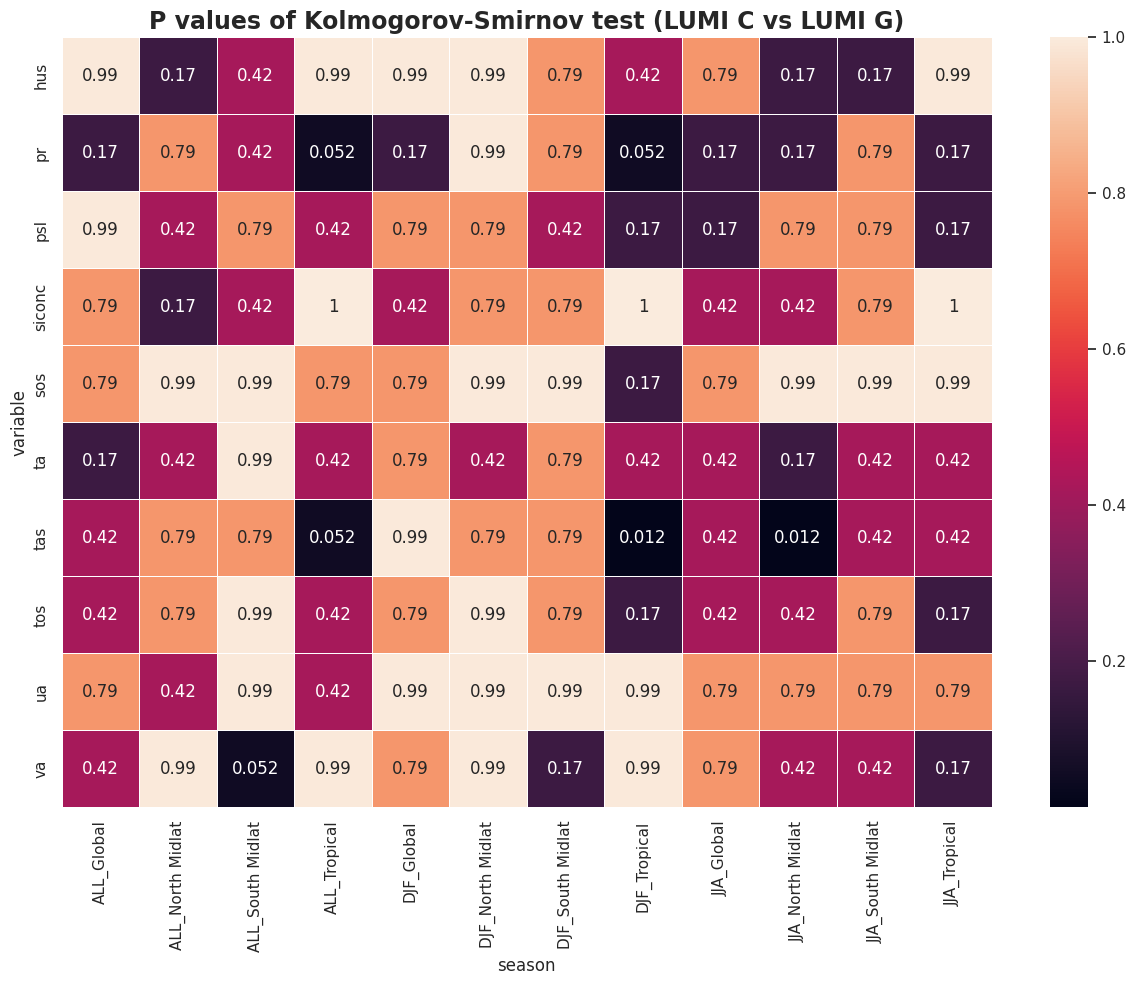